# Kinase data preprocessing

This notebook performs the following preprocessing tasks:

1. Set path to KLIFS download files
2. Load, merge and filter KLIFS download files
3. Download PDB files for KLIFS dataset
4. Remove PDB IDs from KLIFS dataset when PDB download fails
5. Save final KLIFS dataset
6. Analyse gap rate of KLIFS dataset

In [1]:
import os.path
import glob
from pathlib import Path
import sys

from Bio.PDB import PDBList
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.extend(['./..'])
from kinsim_structure.preprocessing import *

%matplotlib inline

### 1. Set path to KLIFS download files

In [2]:
# Path to data directory
dataset_name = '20190724_full'

path_to_data = Path('/') / 'home' / 'dominique' / 'Documents' / 'data' / 'kinsim' / dataset_name
path_to_results = Path('..') / 'results' / dataset_name
path_to_results.mkdir(parents=True, exist_ok=True)

klifs_overview_file = path_to_data / 'raw' / 'KLIFS_download' /'overview.csv'
klifs_export_file = path_to_data / 'raw'/ 'KLIFS_export.csv'

path_to_mol2 = path_to_data / 'raw' / 'KLIFS_download' / 'HUMAN' / '*' / '*' / 'pocket.mol2'
path_to_cif = path_to_data / 'raw' / 'PDB_download' / '*.cif'

### 2. Load, merge and filter KLIFS download files

In [3]:
klifs_data = get_klifs_data_from_files(klifs_overview_file, klifs_export_file)
klifs_data_filtered = filter_klifs_data(klifs_data)

In [4]:
# Check if there are PDB IDs occurring multiple times for one kinase
grouped = klifs_data_filtered.groupby("pdb_id")["kinase"].size()
multiple_pdb_ids = list(grouped[grouped > 1].index)
klifs_data_filtered.loc[klifs_data_filtered.pdb_id.isin(multiple_pdb_ids)].sort_values('pdb_id')

,index,kinase,family,groups,pdb_id,chain,alternate_model,species,ligand_orthosteric_name,ligand_orthosteric_pdb_id,...,dfg,ac_helix,rmsd1,rmsd2,qualityscore,pocket,resolution,missing_residues,missing_atoms,full_ifp
2880,1013,MAPKAPK2,MAPKAPK,CAMK,2onl,C,-,Human,-,-,...,in,in,0.798,2.852,8.0,NAIIDDYKVKVLQFALKMLKARREVELHWRASPHIVRIVDVLIVME...,4.00,0,8,NaN
4303,3825,p38a,MAPK,CMGC,2onl,B,-,Human,-,-,...,in,out-like,0.822,2.133,9.0,SPVGSGAYGSVCAVAVKKLRTYRELRLLKHMKENVIGLLDVYLVTH...,4.00,0,10,NaN
2775,1436,LKB1,CAMKL,CAMK,2wtk,C,-,Human,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,ANP,...,na,na,0.780,2.107,8.0,DLLGEGSYGKVKERAVKILNVKKEIQLLRRLRKNVIQLVDVYMVME...,2.65,0,0,0000000000000010000001000000100000000001000000...
3737,2621,STLK5,STE20,STE,2wtk,E,-,Human,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,ANP,...,na,na,0.791,2.155,8.0,TVIGKGFEDLMTVVTVRRIFLQGELHVSKLFNPNIVPYRATWVVTS...,2.65,0,0,0000000000000010000001000000100000000000000001...
403,2363,BRAF,RAF,TKL,4mne,B,B,Human,-,-,...,in,in,0.796,1.986,6.4,QRIG____GTVYKVAVKMLAFKNEVGVLRKTRVNILLFMGYAIVTQ...,2.85,4,0,NaN
2824,2555,MAP2K1,STE7,STE,4mne,H,B,Human,PHOSPHOMETHYLPHOSPHONIC ACID ADENYLATE ESTER,ACP,...,in,out,0.833,2.218,8.0,SELGAGNGGVVFKMARKLIQIIRELQVLHECNPYIVGFYGASICME...,2.85,0,0,0000000000000010000001000000100000010000001001...
1914,1950,Erk2,MAPK,CMGC,4nif,B,B,Human,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,ANP,...,in,in,0.784,2.095,8.0,SYIGEGAYGMVCSVAIKKIRTLREIKILLRFRENIIGINDIYIVQD...,2.15,0,0,0000000000000010000001000000100000010000000001...
3687,4272,RSK1-b,RSKb,CAMK,4nif,D,A,Human,-,-,...,in,in,0.785,2.114,9.6,ETIGVGSYSECKRYAVKVIDPSEEIEILLRYGPNIITLKDVYLVTE...,2.15,0,4,NaN
1688,678,EGFR,EGFR,TK,4riw,D,-,Human,ADENOSINE-5'-DIPHOSPHATE,ADP,...,in,in,0.787,2.091,8.0,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,3.10,0,0,0000000000000010000000000000000000000000000000...
1871,1491,ErbB3,EGFR,TK,4riw,C,-,Human,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,ANP,...,in,out,0.840,2.205,8.0,KVLGSGVFGTVHKVCIKVIAVTDHMLAIGSLDAHIVRLLGLQLVTQ...,3.10,0,0,0000000000000010000001000000100000000000000001...


### 3. Download PDB files for KLIFS dataset

In [5]:
download_from_pdb(klifs_data_filtered, path_to_data / 'raw' / 'PDB_download')

/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c0i.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j7h.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4utd.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lqe.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5opv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oq5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oq6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oq7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oq8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fc8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fcf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fck.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2cn5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2cn8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2w0j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2w7x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wtc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wtd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wti.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wtj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xbj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xk9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xm8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xm9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ycf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ycq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ycr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ycs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yiq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yir.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yit.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3i6u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3i6w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a9r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a9s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a9t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a9u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bda.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bdb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bdc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bdd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bde.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bdf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bdg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bdh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bdi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bdj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bdk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fqd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gzd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3uys.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3uyt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3uzp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hgt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hnf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kb8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kba.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kbc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kbk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tn6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tw9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4twc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ih4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ih5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ih6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mqv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5okt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5w4w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6f1w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6f26.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gzm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hni.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hok.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2cmw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2c47.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2chl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2izr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2izs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2izt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2izu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g16.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g17.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hgl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hgs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gro.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1jwh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1na7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1pjk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pvr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zjw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3amy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3at2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3at3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3at4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3axw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bqc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3c13.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fwq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3h30.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3juh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mb6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mb7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nga.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nsz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3owj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3owk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3owl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pe1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pe2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q04.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q9w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q9x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q9y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q9z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qa0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r0t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rps.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3u4u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3u87.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3u9c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w8l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3war.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wik.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wil.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wow.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bxa.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bxb.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4dgl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fbx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4grb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gub.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ib5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kwp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4md7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4md8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4md9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nh1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rll.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ub7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uba.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5b0x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5clp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cqu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cqw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cs6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5csh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5csp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5csv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ct0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ctp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cu0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cu2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cu3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cu4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cu6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cvf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cvg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cvh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cx9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5h8b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5h8e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5h8g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ku8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kwh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m44.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m4c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m4f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m4i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mmf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mmr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mo5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mo6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mo7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mo8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mod.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5moe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5moh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mot.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mov.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mow.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mp8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mpj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n1v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n9k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n9l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n9n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nqc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5omy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oni.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oqu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5orh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5orj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ork.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5os7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5os8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5osl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5osp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5osr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5osu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5osz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ot5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ot6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5otd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oth.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oti.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5otl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oto.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5otp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5otq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5otr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ots.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oty.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5otz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oue.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oul.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oum.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ouu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5owh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5owl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oyf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5t1h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zn0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zn1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zn2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zn3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zn4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zn5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6a1c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ehk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ehu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eii.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fvf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fvg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gih.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gmd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hbn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hme.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6jwa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6q38.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6q4q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3e3b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ofm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m4u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m56.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ooi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y9m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5yf9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ywm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hmb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hmc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hmd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hmq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qy9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1z57.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vag.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j1v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j1w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5x8i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ft8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ft9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fyo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g33.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6i5h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6i5i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6i5k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6i5l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6q8k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6q8p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6raa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nr9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5unp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fyi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fyk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fyl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2eu9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2exe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wu6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wu7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3raw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ft7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fyp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fyr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6rct.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fyv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4y83.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4y85.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5iu2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4cxa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nst.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4un0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5acb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6b3e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ckx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1byg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3d7t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3d7u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fg7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fg8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fg9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fgb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jc6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jam.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vz6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3soa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bhh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vn9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wel.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vlo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ayw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2v7o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2w4o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ccf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cd6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zv2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uy6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uyj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vt1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5yv8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5yv9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5yva.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5yvb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5yvc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bku.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ble.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bql.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bqp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bqq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6brc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cmj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ig1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1jkk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1jkl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1jks.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1jkt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1p4f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wvw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wvx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wvy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2w4j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2w4k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x0g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xuu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xzs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2y0a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2y4p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yak.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dfc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dgk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eh9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eha.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3f5g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3f5u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gu4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gu5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gu6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gu7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gu8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gub.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zxt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4b4l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pf4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tl0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4txc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uv0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yo4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ypd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5aut.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5auu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5auv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5auw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5aux.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5auy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5auz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5av0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5av1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5av2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5av3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5av4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6aar.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fha.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fhb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wmk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1z9x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1zws.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2a27.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2a2a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2cke.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yrp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2j90.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bhy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bqr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5a6n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5a6o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vja.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jzj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jzn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zos.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bkj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ckr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bvk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bvn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bvo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bvw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fdp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fdx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6brj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bsd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6few.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fex.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fil.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fim.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fin.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fio.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fiq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gwr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hp9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fer.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cen.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ceo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cep.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ceq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vo1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vo2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vd5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5luq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5w1r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y3r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lm0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lm5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qf4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vx3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wo6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3anq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3anr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aze.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mq1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mq2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nct.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ylj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ylk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yll.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yu2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5a3x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5a4e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5a4l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5a4q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5a4t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5a54.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5aik.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6a1f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6a1g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eif.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eij.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eil.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eip.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eiq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eir.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eis.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eiv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ej4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6s11.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6s14.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6s17.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6s1b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6s1h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6s1i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6s1j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3k2l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kvw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4azf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lxc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lxd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ztn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y86.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1m14.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1m17.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1xkk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2eb2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2eb3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2gs2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2gs6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2gs7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2itn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ito.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2itp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2itq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2itt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2itu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2itv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2itw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2itx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ity.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2itz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2j5e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2j5f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2j6m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jit.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jiu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jiv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rf9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rfd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rfe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rgp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bel.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gop.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gt8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ika.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lzb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3poz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ug1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ug2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vjn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vjo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w2o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w2p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w2q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w2r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w2s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w32.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w33.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g5j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g5p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hjo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i1z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i20.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i21.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i22.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i23.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i24.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jq7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jq8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jr3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jrv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4li5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ll0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4lqm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4lrm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4r3p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4r3r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4r5s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4riw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rix.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4riy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rj4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rj5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rj6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rj7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rj8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tks.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wd5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wkq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wrg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zau.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zjv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zse.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5c8k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5c8m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5c8n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cal.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5can.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cao.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cap.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5caq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cas.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cau.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cav.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cnn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cno.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5czh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5czi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5d41.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5edp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5edq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5edr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5em5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5em6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5em7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5em8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fed.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fee.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5feq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5gmp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5gnk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5gty.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5gtz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hcx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hcy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hcz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hg5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hg7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hg8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hg9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hib.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hic.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j9y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j9z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jeb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5u8l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ug8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ug9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uga.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ugb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ugc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uwd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5x26.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5x27.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5x28.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5x2a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5x2c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5x2f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5x2k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xdk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xdl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xgm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xgn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y25.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y9t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5yu9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zto.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zwj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6d8e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6duk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1mqb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4p2k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pdo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4trl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ek7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5i9u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5i9v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5i9w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5i9x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5i9y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5i9z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ia0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ia1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ia2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ia3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ia4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ia5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5njz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nk0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nk1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nk2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nk3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nk4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nk5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nk6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nk7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nk8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nk9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nka.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nkb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nkc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nkd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nke.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nkf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nkg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nkh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nki.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fnf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fng.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fnh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2gsf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qo2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qo7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qo9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qob.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qoc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qod.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qof.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qoi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qok.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qol.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qon.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qoo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qoq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dzq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fxx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fy2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g2f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gk2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gk3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gk4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4p4c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4p5q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4p5z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4twn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4two.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2r2p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rei.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dko.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kul.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zfx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mja.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mjb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zfm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zfy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5l6o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5l6p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vwu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vwv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vww.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vwx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vwy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vwz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vx0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vx1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x9f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xvd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yn8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zew.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aw5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bb4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fni.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fnj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fnk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fnl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fnm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pp0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rcd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kex.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lmg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4otw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2r4b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bbt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bbw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bce.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zoq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qtb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ges.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1pme.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1tvo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wzy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ojg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2oji.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ojj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2y9q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3i5z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3i60.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3sa0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tei.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w55.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fmq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fux.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fuy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fv0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fv1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fv2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fv3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fv4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fv5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fv6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fv7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fv8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fv9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g6n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g6o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4h3p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4h3q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iz5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iz7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iza.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4n0s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nif.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o6e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qp1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qp2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qp3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qp4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qp6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qp7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qp8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qp9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qpa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qta.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qte.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xj0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zxt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zzm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zzn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zzo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ax3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bue.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bui.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5buj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bvd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bve.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bvf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k4i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lcj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lck.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ngu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nhf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nhh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nhj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nhl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nho.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nhp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nhv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v60.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v61.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v62.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wp1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6d5y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dmg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g54.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g8x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g91.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g92.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g93.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g97.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g9a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g9d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g9h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g9j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g9k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g9m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g9n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gdm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gdq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ge0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gjb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gjd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6q7k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6q7s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6q7t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qa1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qa3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qa4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qag.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qah.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qal.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qaq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qaw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2i6l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4b99.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ic7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ic8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zsg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zsj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zsl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5byy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5byz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o7i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hkm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hkn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1mp8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2etm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ijm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bz3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pxk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ebv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ebw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gu6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gu9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i4e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i4f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k8a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k9y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kab.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kao.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4q9s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6i8z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bkb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cbl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cd3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e93.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6jmf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1agw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1fgi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1fgk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2fgi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3c4f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gqi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gql.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3js2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kxx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ky2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rhx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tt0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wj6.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4f63.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4f64.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4f65.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nk9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nka.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nks.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rwi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rwj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rwk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rwl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uwb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uwc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uwy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4v01.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4v04.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4v05.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wun.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zsa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5a46.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5a4c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5am6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5am7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5b7v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ew8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5flf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o49.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o4a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uq0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ur1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vnd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5z0s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zv2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c18.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c19.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c1b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c1c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c1o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6mzq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6mzw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nvl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6p68.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6p69.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1gjo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1oec.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2psq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pvf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pvy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pwl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2py3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pz5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pzp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pzr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2q0b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3b2t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cly.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ri1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4j95.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4j96.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4j97.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4j98.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4j99.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eg3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ugl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ugx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uhn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ui0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k33.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qq5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qqc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qqj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qqt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qrc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4r6v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tye.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tyg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tyi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tyj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uxq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xcu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jkg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nud.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nwz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xff.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xfj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6jpj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nvg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nvh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nvi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nvj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nvk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hng.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1rjb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rt7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xuf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5x02.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6il3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2i0v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2i0y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2i1m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bea.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dpk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3krj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3krl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lco.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hw7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4r7h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4r7i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3jbz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jsn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jsp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jsv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jsx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jt5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jt6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5flc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5h64.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wbu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wby.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zcs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2dq7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c57.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c58.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c59.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o38.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4y8d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y7z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y80.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yhj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tnb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tnd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2acx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nyn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nyo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1gng.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1h8f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1i09.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1j1b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1j1c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1o9u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1pyx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1q3d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1q3w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1q41.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1q4l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1q5k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1r0e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1uv5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jld.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2o5k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ow3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3du8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3f7z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3f88.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gb2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3i4b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l1s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3m1s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pup.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q3b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3say.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3sd0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zdi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zrk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zrl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zrm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4acc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4acd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4acg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ach.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4afj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4b7t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4dit.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iq6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4j1r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4j71.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nm0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nm3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nm5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nm7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ptc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pte.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ptg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5f94.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5f95.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hln.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hlp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k5n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kpk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kpl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kpm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oy4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5t31.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6b8j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gjo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gn1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6h0u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hk3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hk4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hk7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ad5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1qcf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2c0i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2c0o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2c0t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2hck.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2hk5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vry.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vrz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vs0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vs1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vs2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vs3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vs4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vs5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vs6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vs7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4lud.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4lue.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5h09.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5h0b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5h0e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5h0g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5h0h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zj6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4obo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4obp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4obq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rvt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u3y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u3z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u40.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u41.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u42.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u43.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u44.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u45.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zk5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zp5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5di1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j95.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5w5q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yff.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yfi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6b5j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cqd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cqe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cqf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nfy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nfz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ng0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vuw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wb8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dlz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3e7v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3f2n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fmd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3iq7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ouc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qtc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5htb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5htc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g34.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g35.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g36.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g37.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g38.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g39.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g3a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1jqh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1k3a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1m7n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1p4o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2oj9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zm3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3d94.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3f5p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3i81.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lvp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lw0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nw5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nw6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nw7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3o23.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qqu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d2r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fxq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fxr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fxs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hzn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ebz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tqw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tqx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tqy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e3c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kik.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kmu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kmw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rep.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6mib.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1gag.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1i44.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ir3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1irk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1p14.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1rqq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2auh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2b4s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2z8c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bu3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bu5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bu6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ekk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ekn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eta.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ibm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xlv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e1s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hhw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bfn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2nru.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2nry.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2o8y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2oib.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2oic.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2oid.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rmz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u97.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u9a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xs2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4y73.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yo6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yp8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ztl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ztm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ztn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k72.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k75.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k76.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k7g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k7i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kx7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kx8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5t1s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5t1t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uiq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uir.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uis.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uit.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uiu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5w84.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5w85.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eg9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ega.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6egd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ege.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6egf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6f3d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6f3e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6f3g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6f3i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6n8g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6o8u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6o94.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6o95.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6o9d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3p23.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u6r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yz9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yzc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yzd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4z7g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4z7h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hgi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hv0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hx1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1sm2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1snu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1snx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3miy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mj1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mj2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qgw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qgy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3t9t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v5j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v5l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v8t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v8w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hct.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hcu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hcv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kio.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l7s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m0y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m0z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m12.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m13.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m14.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m15.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mf0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mf1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pp9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ppa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ppb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ppc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pqn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qd6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rfm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eyg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eyh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e4l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e4n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e5w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ehz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ei4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fk6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i5c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ivb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ivc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ivd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k6z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k77.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e1e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hx8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5khw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5khx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wo4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6aah.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bbu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c7y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dbn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6elr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ggh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6n77.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6n78.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6n79.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6n7a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6n7b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6n7c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6n7d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l00.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l01.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2b7a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2w1i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xa4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3e62.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3e63.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3e64.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fup.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3io7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3iok.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3jy9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kck.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3krr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lpb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q32.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rvg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tjc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tjd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ugc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zmm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aqc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bbe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bbf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c61.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c62.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d0w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d0x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d1s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e4m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e6d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e6q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4f08.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4f09.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gfm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gmy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hge.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iva.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ji9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jia.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4p7e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ytc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ytf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yth.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yti.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zim.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5aep.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cf4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cf5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cf6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cf8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hez.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5l3a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tq3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tq4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tq5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tq6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tq7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tq8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5usy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wev.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6aaj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bbv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6drw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fvp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fvq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fvr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5i4n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5usz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ut0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ut1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ut2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ut3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ut4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ut5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ut6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wij.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wik.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wil.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wim.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5win.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6brw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bs0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bss.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6d2i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g3c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6m9h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yvj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lxk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lxl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pjc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zc6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zep.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hvd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hvg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hvh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hvi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i6q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qps.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qt1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rio.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4v0g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4z16.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lwm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lwn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5toz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tts.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ttu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ttv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vo6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5w86.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wfj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6aak.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6da4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6db3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6db4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dud.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gl9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gla.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6glb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ny4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ukh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1uki.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2g01.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2gmx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2h96.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2no3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xrw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xs0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3elj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3o17.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3o2m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pze.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v3v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vud.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vug.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vuh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vui.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vuk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vul.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vum.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4awi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e73.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g1w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hys.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hyu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4izy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l7f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qtd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ux9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yr8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5len.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lw1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6f5e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3e7o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3npc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1jnk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1pmn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1pmq.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1pmu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1pmv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2b1p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2exc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2o0u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2o2u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ok1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2p33.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2r9s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2waj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zdt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zdu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cgf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cgo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3da6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fi2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fi3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fv8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3g90.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3g9l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3g9n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kvx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3oxi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3oy1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ptg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rtp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tti.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ttj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v6r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v6s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4h36.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4h39.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4h3b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kke.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kkg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kkh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u79.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4w4v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4w4w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4w4x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4w4y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4whz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x21.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4y46.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4y5h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4z9l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ekd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6emh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eq9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1vr2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1y6a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1y6b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ywn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2oh4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2p2h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2p2i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qu5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qu6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rl5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xir.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3b8q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3b8r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3be2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3c7q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cjf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cjg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cp9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cpb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cpc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dtw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3efl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ewh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3u6j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vhe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vhk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vid.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vnt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vo3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wzd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wze.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ag8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4agc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4agd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4asd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ase.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ew3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gqo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gqp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gqq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j5t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1pkg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1t45.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1t46.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3g0e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3g0f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hvs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u0i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gqj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gqk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gql.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gqm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2y4i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kkr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1qpc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1qpd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1qpe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1qpj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2of2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2of4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ofu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ofv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2og8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pl0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zm1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zm4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zyb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ac1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ac2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ac3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ac4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ac5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ac8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3acj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ack.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ad4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ad5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ad6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3b2w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bym.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3byo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bys.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3byu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kmm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kxz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lck.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mpm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c3f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3s95.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hvj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hvk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5l6w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nxc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tpt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nxd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wtk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2j7t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aot.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bc6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4equ.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4usd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4use.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ajq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5owq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5owr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6eim.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gtt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hxf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6i2y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a4o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xy1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1s9j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2p55.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dv3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dy7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3e8n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eqb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eqc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eqd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eqf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eqg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eqh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3eqi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mbl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3orn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3os3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pp1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3sls.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v01.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v04.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vvh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w8q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wig.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zls.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zlw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zlx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zly.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zm4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4an2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4an3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4an9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4anb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ark.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4lmn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u7z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u80.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u81.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bx0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eym.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hze.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5yt3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1s9i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3aln.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3alo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vut.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3enm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fme.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vn9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2dyl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wzu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5b2k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5b2l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5b2m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y8u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y90.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5z1d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5z1e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ib0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ib2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qfl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qfr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qft.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qg4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qg7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qho.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qhr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2clq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vw6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bf2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bhn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bib.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bic.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bid.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bie.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uor.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uox.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5up3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v19.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v24.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vil.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vio.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6e2m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6e2n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6e2o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1kwp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1nxk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ny3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jbo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jbp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2onl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2oza.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2p3g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pzy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a2c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fpm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fyj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fyk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gok.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ka0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kc3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kga.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3m2w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3m42.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r2b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r2y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r30.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wi6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tyh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fhr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fxw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r1n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3she.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2hak.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c9d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3iec.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eak.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kz7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kz8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qnj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fe3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5es1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5loh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bky.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bkz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bl1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d2p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d2t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d2v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d2w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ixp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ump.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4umq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4umr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4umt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4umu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ih8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ih9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5iha.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ihc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k00.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m5a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5maf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mag.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mah.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mai.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tvt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5twl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5twu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5twy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5twz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tx3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gvx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2p0c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bpr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3brb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tcp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m3q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mh7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mha.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k0k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k0x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tc0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5td2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5u6c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1r0p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1r1w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2g15.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rfn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rfs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wd1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wgj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wkm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a4p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3c1x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ccn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cd8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ce3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cth.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ctj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dkc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dkf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dkg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3efj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3efk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3f66.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3f82.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3i5n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l8v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lq8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q6u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q6w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qti.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r7o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rhk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3u6h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3u6i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vw8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zbx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zc5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zcl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zxz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zze.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aoi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ap7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4deg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4deh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4dei.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eev.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gg5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gg7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iwd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4knb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mxc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4r1v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4r1y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xmo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xyf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dg5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eob.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eyc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eyd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hlw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hni.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ho6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hoa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hor.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hti.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5t3q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uab.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uad.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uaf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ya5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dtc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uy9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uya.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m67.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mwi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5knj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ko1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bwk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2hw6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wvd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ac3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ac5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2hw7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cj5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cje.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cjh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cjw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cjy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ck3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ck6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cki.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2buj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qfv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tku.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uak.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ual.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ote.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5otf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1vzo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kn5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kn6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3com.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4lg4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4lgd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dh3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ao5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a7f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a7g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a7h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a7i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a7j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ckw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ckx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zhp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o27.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qml.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qms.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qmz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qna.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4qo9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4u8z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4w8d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4w8e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ggf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fza.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fzd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fzf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3p1a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vcv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vcw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vcx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vcy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vcz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vd0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vd1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vd3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bxi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4apc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4b9d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jav.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2w5a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2w5b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2w5h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wqo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xk3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xk4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xk6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xk7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xk8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xkc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xkd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xke.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xkf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xnm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xnn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xno.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xnp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a4x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4afe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m51.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m53.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m55.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m57.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6h0o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wqm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wqn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5de2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gt1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6npy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4dn5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g3d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4idt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4idv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2vwi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dak.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1f3m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yhv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yhw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2hy8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fxz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fy0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q4z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q52.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3q53.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4daw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eqc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o0r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o0t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4p90.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zji.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zjj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zlo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zy4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zy5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zy6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dew.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dey.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dfp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ime.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kbq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kbr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6b16.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fd3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bva.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2cdz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2j0i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2q0n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x4z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4app.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fie.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fif.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fig.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fih.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fii.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fij.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jdh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jdi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jdj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jdk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l67.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4njd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o0v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o0x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o0y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xbr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xbu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bms.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5i0b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5upk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5upl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ved.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vee.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vef.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xva.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xvf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xvg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5zjw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2f57.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2c30.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ks7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ks8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dls.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j0a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mtl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5g6v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5grn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5k5x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6a32.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ogv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lcd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1h1w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1oky.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1okz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1uu3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1uu7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1uu8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1uu9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1uvr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1z5m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2biy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pe0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pe1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2pe2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2r7b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xch.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xck.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3h9o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hrc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hrf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ion.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3iop.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nax.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nay.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nun.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nus.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nuu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nuy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3orx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3orz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3otu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pwy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qc4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qcq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qcs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qcx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qcy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qd0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qd3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qd4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rcj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rwp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rwq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3sc1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a06.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a07.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aw0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aw1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ct1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ct2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rqk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rqv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rrv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xx9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ack.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hkm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hng.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ho7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ho8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lvl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lvm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lvn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lvo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lvp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mrd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g31.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g34.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4m7i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x7h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x7j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x7k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x7l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x7n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x7o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2y7j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hnd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hne.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pla.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yc4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eut.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5i0n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wtv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bq1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d0l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d0m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wae.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wag.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5c46.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5c4g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5euq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fbl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fbq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fbr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fbv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fbw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gl3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ihy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ls8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4oys.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ph4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uwf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uwg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uwh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uwk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uwl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5anl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5enn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6i3u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1xqz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1xr1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1xws.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yhs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yi3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yi4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ywv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yxs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yxt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yxu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yxv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yxx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bik.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bil.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bzh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bzi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bzj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bzk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2c3i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2j2i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2o3p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2o63.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2o64.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2o65.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2obj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2oi4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xix.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xiy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xiz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xj0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xj1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xj2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a99.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bgp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bgq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bgz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bwf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3c4e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cxw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cy2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cy3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dcv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3f2a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3jpv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3jxw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3jy0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3jya.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ma3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qf9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r00.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r01.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r02.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r04.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3t9i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3uix.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3umw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3umx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vbq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vbt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vbv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vbw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vbx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vby.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vc4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3we8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a7c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4alu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4alv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4alw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4as0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bzn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bzo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4dtk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4enx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eny.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gw8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i41.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iaa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jx3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jx7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k0y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k18.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k1b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ll5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4lm5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4lmu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mbi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mbl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4med.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mta.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4n6y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4n6z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4n70.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rbl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rc2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rc3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rc4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rpv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ty1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wrs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wsy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wt6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xh6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xhk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5c1q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dgz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dhj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dia.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dwr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eol.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5iis.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ipj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kcx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kgd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kge.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kgg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kgi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kgk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kzi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mzl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n4n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n4o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n4r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n4u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n4v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n4x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n4y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n4z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n50.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n51.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n52.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n5l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n5m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ndt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o11.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o12.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o13.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tel.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tex.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5toe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tur.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v80.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v82.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vua.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vub.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vuc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ayd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bsk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6mt0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6no9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6pcw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6pdi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6pdn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6pdo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6pdp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qxk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2iwi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x7q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2gu8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3agl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3agm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ama.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3amb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l9l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l9m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l9n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mvj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nx8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3oog.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ovv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3owp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3oxt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3p0m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3poo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vqh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ae6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ae9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uj1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uj2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uj9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uja.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ujb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wb5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wb6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wb7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wb8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bx6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bx7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5izf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5izj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j5x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n23.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uzk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6byr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bys.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c0u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6frx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6no7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3iw4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ra4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2i0e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3txo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1zrz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a8w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a8x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zh8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5li1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5li9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lih.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ilz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1xjd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jed.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4q9z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ra5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5f9e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bdl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bg2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c0t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4otd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4otg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4oth.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4oti.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4crs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2a19.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2a1a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3uiu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6d3k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6d3l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ou7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2owb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rku.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2v5q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yac.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fc2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kb7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3thb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a4l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a4o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4j52.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4j53.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ta6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ta8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i5m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i5p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i6b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i6f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i6h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4b6l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cok.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jxf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yur.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ian.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ifc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iir.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ijp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cnh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cc6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3et7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fzo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fzp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fzr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fzs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fzt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3h3c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4h1j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4h1m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5to8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tob.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3omv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ivs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ivt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ivu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ivv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x2k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x2l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x2m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4cki.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ckj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5amn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fm2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fm3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fek.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ne7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nec.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nja.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4otp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g5i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fdm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fdn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fdo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g18.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g51.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hk6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ith.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iti.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4itj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4neu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hx6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tx5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c3e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c4d.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hho.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nw2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nyh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ocq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6r5f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6rln.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c8b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ar2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ar3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ar4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ar5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ar7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ar8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j79.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j7b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ng0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ng2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ng3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5w5j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5w5o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6es0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fu5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hmx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6rn8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6rna.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4oau.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4oav.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2esm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2etk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2etr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2v55.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3d9v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ncz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ndm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tv7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3twj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v8s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4w7p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yvc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yve.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5bml.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hvu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kks.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kkt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uzj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wne.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wnf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wng.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wnh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6e9w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l6q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wot.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5u7q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5u7r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ed6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pls.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zzw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gt4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zbf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4uxl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2z7q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2z7r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2z7s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wnt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rny.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nus.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nw5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nw6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5d9k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5d9l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d9t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d9u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jg6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jg7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jg8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g76.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g77.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g78.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2r5t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hdm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hdn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2j51.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jfl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jfm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2uv2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4usf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hvd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5yks.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1fmk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ksw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1y57.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yi6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yoj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yol.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yom.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bdf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bdj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2h8h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2src.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k11.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mxo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mxx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mxy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4mxz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ate.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wak.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wbp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3beg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wua.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mxx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5my8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xv7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x7g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5myv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gni.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1xba.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1xbb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1xbc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3emg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fqe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fqh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fqs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3srv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tub.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tuc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tud.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vf8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vf9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4dfl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4dfn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4f4p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fl1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fl2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fl3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fyn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fyo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fz6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fz7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gfg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i0r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i0s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4i0t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4puz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pv0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4px6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rss.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rx7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rx8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rx9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wnm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xg2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xg3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xg4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xg5.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xg6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xg7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xg8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xg9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yjo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yjp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yjq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yjr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yjs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yjt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yju.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yjv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5c26.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5c27.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cxh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cxz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cy3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ghv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lma.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5lmb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5t68.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tiu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tr6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tt7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y5t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5y5u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hm6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hm7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x4f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ve6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bhc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5l2q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2eva.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yiy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gs6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l3p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l52.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l53.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o91.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e7r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5gjd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5gjf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5gjg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j7s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j8i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5j9l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jga.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jgb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jgd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jh6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jk3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v5n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bdn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eut.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4euu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4im0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4im2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4im3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iw0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iwo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iwp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4iwq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5w5v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bny.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bod.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6boe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cq0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cq4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cq5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nt9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6o8b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1b6c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ias.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1py5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1rw8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1vjy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wot.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wou.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x7o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3faa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gxl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hmm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kcf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tzm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x0m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x2f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x2g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x2j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x2k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x2n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e8s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e8t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e8u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e8w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e8x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e8z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e90.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fri.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5qik.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5qil.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5qim.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5usq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6b8y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e8v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e8y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e91.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5e92.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5qin.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1fvr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2oo8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2osc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2p4i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2wqb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l8p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4x3j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6mwe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o0y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x7f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ax9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cwz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5d7a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aoj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4f0i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gt5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pmm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pmp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pms.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pmt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yne.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yps.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5h3q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5i8a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jfs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jfv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jfw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jfx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kmi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kmj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kmk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kml.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kmm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kmn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kmo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kvt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wr7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6d1y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6d1z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6d20.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6d22.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dkb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dkg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dki.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dkw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6j5l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6npt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nsp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nss.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4asz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4at3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4at4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4at5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3v5q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ymj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4btj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4btk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4btm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nfm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nfn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2x9e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zmc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zmd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cek.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dbq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gfw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3h9f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hmn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hmo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hmp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3vqu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3w1f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wyx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wyy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wzj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wzk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bhz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bi0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bi1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4bi2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c4e.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c4f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c4g.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c4h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c4i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4c4j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4cv8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4cv9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4cva.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4d2s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4js8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jt3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4o6l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zeg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ap0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ap1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ap2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ap3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ap4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ap5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ap6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ap7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eh0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ehl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eho.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ehy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ei2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ei6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ei8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ljj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mrb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n7v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n84.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n87.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n93.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n9s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5na0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5nad.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ntt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o91.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6b4w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gvj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6h3k.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6n6o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1tki.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jnw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lxn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lxp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nyx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nz0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gfo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gih.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gii.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gj2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gj3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gvj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4py1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5f1z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5f20.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wal.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6aam.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dbk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dbm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zon.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4oli.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wov.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5c01.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5c03.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tkd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nze.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nzf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nzh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cek.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5cem.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dc0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wno.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wnp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ci7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6mnh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qas.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qat.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qau.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6qav.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fdy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fdz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2kty.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2kul.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2lav.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rsv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3op5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uge.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ukf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uvf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ac9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bp0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bru.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6btw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bu6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6bw7.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cfm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cmm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cnx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6cqh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6csw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6dd4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6npn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2v62.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tkx.cif


Desired structure doesn't exists
/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uu1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6ncg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2jii.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1x8b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2in6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2io6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2z2w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bi6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3biz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cqe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cr0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5v5y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vc3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vc4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vc5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vc6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vd2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vd4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vd5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vd7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vd8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vd9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vda.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vdk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4pwn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tf9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wdy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5we8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o1v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o21.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o23.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o26.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o2b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o2c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fr4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2xik.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4nzw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5hes.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5x5o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6jut.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1u59.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2ozo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4k2r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rd0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hhm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hiz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zim.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4jps.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l1b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l23.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l2y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ovu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ovv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tuu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4tv3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4waf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ykn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zop.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dxh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dxt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5fi4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5itd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sw8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5swg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5swo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5swp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5swr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5swt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sx8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sx9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sxa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sxb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sxc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sxd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sxe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sxf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sxi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sxj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5sxk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ubr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5uk8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ukj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ul1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xgh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xgi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xgj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6nct.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6oac.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5dxu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5m6u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5t8f.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ubt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5vlr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6g6w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1e8y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1e8z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1he8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2a4z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2a5u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2chw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2chx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2chz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2v4l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3apc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3apd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3apf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3csf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3cst.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dbs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dpd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ene.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ibe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l08.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l13.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l16.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l17.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l54.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lj3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mjw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ml8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ml9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nzs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nzu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3oaw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3p2b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pre.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3prz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ps6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qaq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qar.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qjz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qk0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r7q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3r7r.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3s2a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3sd5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3t8m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tjp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3tl5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zvv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zw3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4anu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4anv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4anw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4anx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aof.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4dk5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ezj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ezk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ezl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4f1s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fa6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fad.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fhj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fhk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fjy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fjz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4flh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ful.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4g11.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4gb9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hle.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4hvb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4j6i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kz0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kzc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ps3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ps7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ps8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4urk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wwn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wwo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4wwp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xx5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4xz4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eds.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5g2n.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5g55.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jha.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5jhb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5kae.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5oq4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5t23.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6aud.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6c1s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6fh5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6gq7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1a9u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1bl6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1bl7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1bmk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1di9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1kv1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1kv2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1m7q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ouk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ouy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1ove.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1oz1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1r39.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1r3c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1w7h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1w82.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1w83.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1w84.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wbn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wbo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wbs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wbt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wbv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wbw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1wfc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1yqj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1zyj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1zz2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1zzl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2baj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bak.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2bal.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2baq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2fsl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2fsm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2fso.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2fst.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2gfs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2i0h.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2lgc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2npq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2okr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2qd9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rg5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2rg6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2y8o.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yis.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yiw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2yix.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zaz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zb0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/2zb1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bv2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bv3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3bx5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3c5u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ctq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3d7z.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3d83.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ds6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3dt1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3e92.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3e93.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fc1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fi4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fkl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fkn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fko.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fl4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fln.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3flq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fls.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3flw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fly.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3flz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fmh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fmj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fmk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fml.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fmm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fmn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fsf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3fsk.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gc7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gcp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gcq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gcs.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gcu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gcv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gfe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gi3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ha8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hec.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3heg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hl7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hll.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hp2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hp5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hrb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hub.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3huc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hv3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hv4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hv5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hv6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hv7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3hvc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3iph.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3itz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3iw5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3iw6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3iw7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3iw8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3k3i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3k3j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kf7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3kq7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l8s.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3l8x.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lfa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lfb.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lfc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lfd.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lfe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lff.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3lhj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mgy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mh0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mh1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mh2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mh3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mpa.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mpt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mvl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mvm.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3mw1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3new.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nnu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nnv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nnw.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nnx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3nww.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3o8p.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3o8t.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3o8u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3obg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3obj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3oc1.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ocg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3od6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3ody.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3odz.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3oef.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3pg3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3qud.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3que.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3rin.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3roc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3s3i.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3s4q.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3u8w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3uvp.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3uvq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3uvr.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zs5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zsg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zsh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zsi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3zya.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4a9y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aa0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aa4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aa5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4aac.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4dli.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4dlj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e5a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e5b.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e6a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e6c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4e8a.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eh2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eh3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eh4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eh5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eh6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eh7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eh8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eh9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ehv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4ewq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4f9w.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4f9y.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4fa2.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4geo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kin.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kip.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4kiq.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l8m.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4r3c.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4zth.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eta.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5etc.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5etf.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eti.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ml5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mtx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mty.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5mz3.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n63.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n64.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n65.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n66.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n67.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5n68.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o8u.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5o8v.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5omg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5omh.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tbe.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5tco.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5wjj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xyx.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5xyy.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6anl.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hwt.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hwu.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6hwv.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6m95.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/6m9l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gc8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gc9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3gp0.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3coi.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eyj.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4eym.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4myg.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4yno.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5ekn.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/5eko.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/1cm8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a60.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a61.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3a62.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3we4.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wf5.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wf6.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wf7.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wf8.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/3wf9.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l3j.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l3l.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l42.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l43.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l44.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l45.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4l46.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rlo.cif


/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/4rlp.cif


### 4. Remove PDB IDs from KLIFS dataset when PDB download fails 

In [6]:
mol2_paths = glob.glob(str(path_to_mol2))
cif_paths = glob.glob(str(path_to_cif))

In [7]:
# PDB IDs with mol2 files
mol2_pdbs = set([list(Path(path).parents)[0].stem.split('_')[0] for path in mol2_paths])

# PDB IDs with cif files
cif_pdbs = set([Path(path).stem for path in cif_paths])

# PDB IDs listed in KLIFS download metadata
klifs_pdbs = set(klifs_data_filtered.pdb_id)

In [8]:
print(f'Number of PDB IDs in KLIFS metadata:      {len(klifs_pdbs)}')
print(f'Number of PDB IDs in KLIFS mol2 download: {len(mol2_pdbs)}')
print(f'Number of PDB IDs in cif download:        {len(cif_pdbs)}')

Number of PDB IDs in KLIFS metadata:      4514
Number of PDB IDs in KLIFS mol2 download: 4514
Number of PDB IDs in cif download:        4501


In [10]:
# Missing CIF files that are in the KLIFS dataset (deprecated PDB entries)
missing_pdbs = mol2_pdbs - cif_pdbs
missing_pdbs

{'1pmq',
 '3wj6',
 '4bxa',
 '4bxb',
 '4utd',
 '4xg5',
 '5j7h',
 '5len',
 '5lqe',
 '5tkx',
 '5uge',
 '6bw7',
 '6c0i'}

In [11]:
pdbfile = PDBList()

for i in missing_pdbs:
    pdbfile.retrieve_pdb_file(i, pdir='/home/dominique/Documents/data/kinsim/20190724_full/raw/PDB_download/')

Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Desired structure doesn't exists


Remove these deprecated PDB IDs from the KLIFS dataset.

In [12]:
klifs_data_filtered.pdb_id

0       4wsq
1       5l4q
2       5te0
3       1opl
4       2e2b
        ... 
4516    4l44
4517    4l45
4518    4l46
4519    4rlo
4520    4rlp
Name: pdb_id, Length: 4521, dtype: object

In [13]:
klifs_data_filtered.drop(index=0, inplace=False)

,index,kinase,family,groups,pdb_id,chain,alternate_model,species,ligand_orthosteric_name,ligand_orthosteric_pdb_id,...,dfg,ac_helix,rmsd1,rmsd2,qualityscore,pocket,resolution,missing_residues,missing_atoms,full_ifp
1,10043,AAK1,NAK,Other,5l4q,A,A,Human,"~{N}-[5-(4-cyanophenyl)-1~{H}-pyrrolo[2,3-b]py...",LKB,...,in,in,0.780,2.137,9.7,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.97,0,3,0000000000000010000000000000000000000000000000...
2,7046,AAK1,NAK,Other,5te0,A,-,Human,methyl (3Z)-3-{[(4-{methyl[(4-methylpiperazin-...,XIN,...,in,in,0.776,2.120,8.8,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.90,0,12,1000101000000010000001000000000000000000000000...
3,7953,ABL1,Abl,TK,1opl,B,-,Human,"6-(2,6-DICHLOROPHENYL)-2-{[3-(HYDROXYMETHYL)PH...",P16,...,out-like,in,0.833,2.134,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,3.42,0,0,0000000000000010000001000000000000000000000000...
4,812,ABL1,Abl,TK,2e2b,A,-,Human,"N-[3-(4,5'-BIPYRIMIDIN-2-YLAMINO)-4-METHYLPHEN...",406,...,out,out,0.920,2.306,7.6,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.20,0,0,0000000000000010000000000000000000000000000000...
5,843,ABL1,Abl,TK,2f4j,A,-,Human,CYCLOPROPANECARBOXYLIC ACID {4-[4-(4-METHYL-PI...,VX6,...,in,in,0.779,2.128,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.91,0,0,0000000000000010000001000000000000000000000000...
6,836,ABL1,Abl,TK,2fo0,A,-,Human,"6-(2,6-DICHLOROPHENYL)-2-{[3-(HYDROXYMETHYL)PH...",P16,...,out-like,in,0.836,2.136,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.27,0,0,0000000000000010000000000000000000000000000000...
7,815,ABL1,Abl,TK,2g1t,A,-,Human,-,-,...,in,out,0.825,2.154,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.80,0,0,NaN
8,821,ABL1,Abl,TK,2g2f,A,-,Human,-,-,...,out-like,in,0.871,2.110,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.70,0,0,NaN
9,822,ABL1,Abl,TK,2g2h,B,-,Human,"6-(2,6-DICHLOROPHENYL)-2-{[3-(HYDROXYMETHYL)PH...",P16,...,out-like,in,0.863,2.140,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.00,0,0,0000000000000010000000000000000000000000000000...
10,859,ABL1,Abl,TK,2g2i,A,-,Human,ADENOSINE-5'-DIPHOSPHATE,ADP,...,in,in,0.789,1.993,6.8,HKLGGG___EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,3.12,3,0,0000000000000010000001000000000000000000000000...


In [14]:
for i in missing_pdbs:
    klifs_data_filtered.drop(index=klifs_data_filtered[klifs_data_filtered.pdb_id == i].index, inplace=True)

In [21]:
# PDB IDs listed in KLIFS download metadata
klifs_pdbs = set(klifs_data_filtered.pdb_id)

In [22]:
print(f'Number of PDB IDs in KLIFS metadata:      {len(klifs_pdbs)}')
print(f'Number of PDB IDs in KLIFS mol2 download: {len(mol2_pdbs)}')
print(f'Number of PDB IDs in cif download:        {len(cif_pdbs)}')

Number of PDB IDs in KLIFS metadata:      4501
Number of PDB IDs in KLIFS mol2 download: 4514
Number of PDB IDs in cif download:        4501


### 5. Save final KLIFS dataset

In [16]:
klifs_data_filtered.to_csv(path_to_data / 'preprocessed' / 'klifs_data_preprocessed.csv')

### 6. Analyse gap rate of KLIFS dataset

In [17]:
gap_rate = calculate_gap_rate(klifs_data)

In [29]:
def plot_gap_rate(gap_rate):
    plt.figure(figsize=(15,6))
    ax = sns.barplot(x='klifs_position', 
                     y='gap_rate', 
                     data=gap_rate,
                     color='steelblue')
    ax.set_title('KLIFS sequence alignment: Gap rate for the 85 residue positions')
    ax.set_xlabel('Alignment residue position')
    ax.set_ylabel('Gap rate')
    ax.xaxis.set_ticks(np.arange(0,85,5));
    ax.set_xticklabels(np.arange(0,85,5));
    
    plt.savefig(path_to_results / 'plot_gap_rate.png', dpi=300)

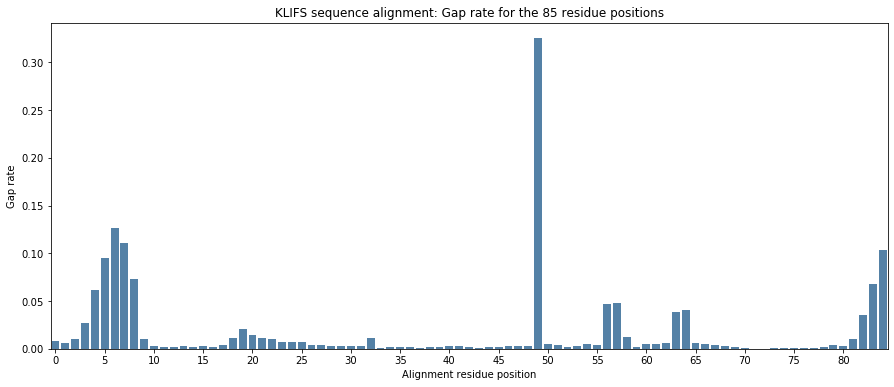

In [32]:
plot_gap_rate(gap_rate)